# Exploring Volatility Dynamics in Financial Markets

This project aims to investigate and analyze volatility in financial markets using Python. Volatility is a critical parameter in finance, influencing risk management, pricing models, and investment strategies. The project focuses on developing Python-based tools to measure, model, and analyze volatility, utilizing real-world financial data.

In [23]:
#Import libraries

!pip install openpyxl

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import seaborn as sns

## 1) Volatility Measurement

Implement and compare different volatility measures (e.g., historical volatility, implied volatility)

### 1.1) Historical volatility

In [2]:
# Function to fetch historical stock price data
def get_stock_data(ticker, start_date, end_date):
    """
    Retrieve historical stock data for a given symbol and date range.

    Parameters:
    - symbol (str): Ticker symbol of the stock (e.g., 'AAPL' for Apple).
    - start_date (str): Start date in the format 'YYYY-MM-DD'.
    - end_date (str): End date in the format 'YYYY-MM-DD'.

    Returns:
    - DataFrame: Historical stock data with Date as the index.
    """
        
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

def calculate_historical_volatility(stock_data, window_size=21):
    """
    Calculate historical volatility of a stock.

    Parameters:
    - stock_data: Stock symbol data
    - window_size: Rolling window size for calculating volatility (default is 21)

    Returns:
    - historical_volatility: Pandas Series with historical volatility values
    """
    # Calculate logarithmic returns
    stock_data['Log_Return'] = stock_data['Adj Close'].pct_change().apply(lambda x: np.log(1 + x))

    # Calculate historical volatility
    historical_volatility = stock_data['Log_Return'].rolling(window=window_size).std() * np.sqrt(252)

    return historical_volatility

ticker_symbol = "AAPL"  # Apple Inc. stock symbol
start_date = "2022-01-01"
end_date = "2023-01-01"

stock_df = get_stock_data(ticker_symbol, start_date, end_date)

historical_volatility = calculate_historical_volatility(stock_df)

# Display detected high volatility periods
#print(high_volatility_periods)

# Plot stock prices, historical volatility, and high volatility periods
#plot_high_volatility_periods(stock_df, historical_volatility, high_volatility_periods, benchmark_df, historical_volatility_bm)

[*********************100%%**********************]  1 of 1 completed


Create a function to plot the stock price and the historical volatility

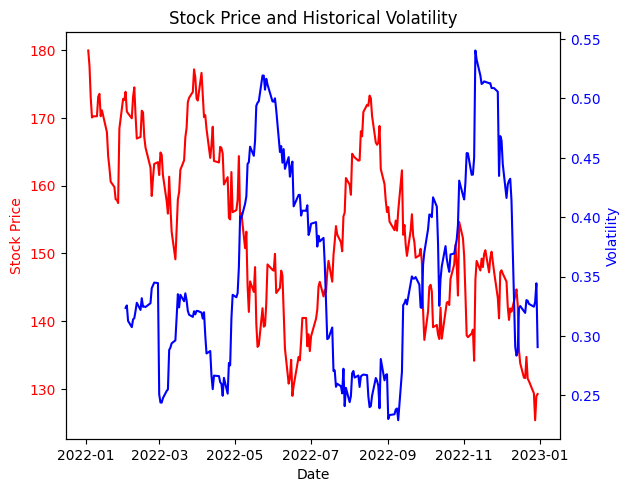

In [3]:
def plot_return_volatility(stock_data, historical_volatility):
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color="red")
    ax1.plot(stock_data.index, stock_data['Adj Close'], color="red")
    ax1.tick_params(axis='y', labelcolor="red")

    ax2 = ax1.twinx()
    ax2.set_ylabel('Volatility', color="blue")
    ax2.plot(historical_volatility.index, historical_volatility, color="blue")
    ax2.tick_params(axis='y', labelcolor="blue")

    fig.tight_layout()
    plt.title('Stock Price and Historical Volatility')
    plt.show()

plot_return_volatility(stock_df, historical_volatility)

Add a benchmark to compare this historical volatility and create a function to plot this benchmark

[*********************100%%**********************]  1 of 1 completed


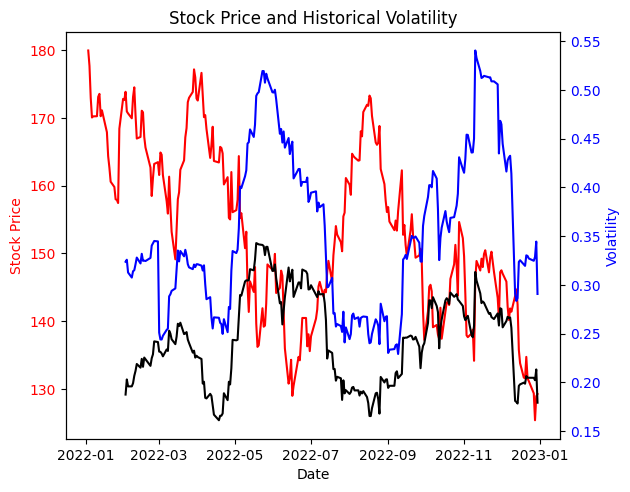

In [4]:
benchmark_df = get_stock_data("^GSPC", start_date, end_date)
historical_volatility_bm = calculate_historical_volatility(benchmark_df)

def plot_return_volatility_with_benchmark(stock_data, historical_volatility, benchmark_historical_volatility):
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color="red")
    ax1.plot(stock_data.index, stock_data['Adj Close'], color="red")
    ax1.tick_params(axis='y', labelcolor="red")

    ax2 = ax1.twinx()
    ax2.set_ylabel('Volatility', color="blue")
    ax2.plot(historical_volatility.index, historical_volatility, color="blue")
    ax2.plot(benchmark_historical_volatility.index, benchmark_historical_volatility, color="black")
    ax2.tick_params(axis='y', labelcolor="blue")

    fig.tight_layout()
    plt.title('Stock Price and Historical Volatility')
    plt.show()
    
plot_return_volatility_with_benchmark(stock_df, historical_volatility, historical_volatility_bm)

Comment this graph. Why the benchmark volatility is lower ? 

### 1.1) Optional: plot high volatility periods on the graph

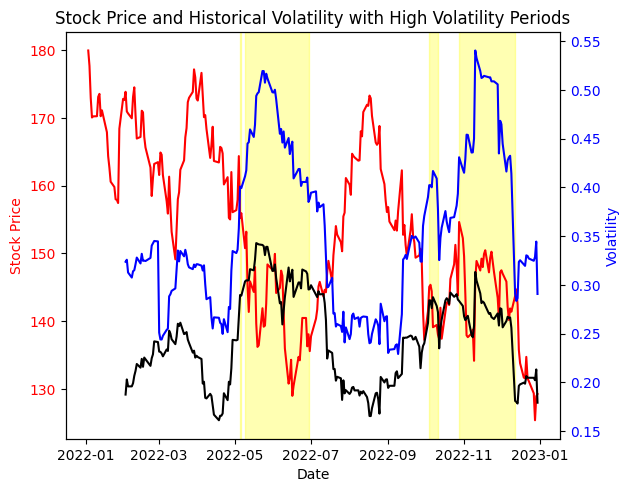

In [5]:
def detect_high_volatility_periods(historical_volatility, threshold=0.40):
    """
    Detect periods of high volatility based on a threshold.

    Parameters:
    - historical_volatility: Pandas Series with historical volatility values
    - threshold: Threshold for identifying high volatility periods

    Returns:
    - high_volatility_periods: DataFrame with start and end dates of high volatility periods
    """
    high_volatility_periods = pd.DataFrame(columns=['Start Date', 'End Date'])

    inside_high_volatility_period = False
    for date, volatility in historical_volatility.items():
        if volatility > threshold:
            if not inside_high_volatility_period:                
                df_new_row = pd.DataFrame({ 'Start Date': [date]})
                high_volatility_periods = pd.concat([high_volatility_periods, df_new_row], ignore_index=True)

                inside_high_volatility_period = True
        elif inside_high_volatility_period:
            high_volatility_periods.at[high_volatility_periods.index[-1], 'End Date'] = date
            inside_high_volatility_period = False

    # Handle the case where the last period extends to the end of the data
    if inside_high_volatility_period:
        high_volatility_periods.at[high_volatility_periods.index[-1], 'End Date'] = historical_volatility.index[-1]

    return high_volatility_periods

def plot_return_volatility_with_benchmark(stock_data, historical_volatility, benchmark_historical_volatility, high_volatility_periods):
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color="red")
    ax1.plot(stock_data.index, stock_data['Adj Close'], color="red")
    ax1.tick_params(axis='y', labelcolor="red")

    ax2 = ax1.twinx()
    ax2.set_ylabel('Volatility', color="blue")
    ax2.plot(historical_volatility.index, historical_volatility, color="blue")
    ax2.plot(benchmark_historical_volatility.index, benchmark_historical_volatility, color="black")
    ax2.tick_params(axis='y', labelcolor="blue")

    for _, row in high_volatility_periods.iterrows():
        ax1.axvspan(row['Start Date'], row['End Date'], color='yellow', alpha=0.3)

    fig.tight_layout()
    plt.title('Stock Price and Historical Volatility with High Volatility Periods')
    plt.show()
    
# Detect periods of high volatility
high_volatility_periods = detect_high_volatility_periods(historical_volatility)

plot_return_volatility_with_benchmark(stock_df, historical_volatility, historical_volatility_bm, high_volatility_periods)

### 1.2) Implied volatility

Write functions to compute call and put options price in Black-Scholes model. Those functions should be vectorized (an array of spot price can be used in input).

In [6]:
def black_scholes_vectorized(S, K, T, r, sigma, is_call=True):
    """
    Calculate the Black-Scholes call option price using vectorized operations.

    Parameters:
    - S: Current stock price or an array of stock prices
    - K: Option strike price
    - T: Time to expiration (in years)
    - r: Risk-free interest rate
    - sigma: Volatility of the underlying stock or an array of volatilities

    Returns:
    - call_price: Black-Scholes call option price or an array of prices
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if is_call:
        N_d1 = norm.cdf(d1)
        N_d2 = norm.cdf(d2)
    
        option_price = S * N_d1 - K * np.exp(-r * T) * N_d2
    else:
        N_minus_d1 = norm.cdf(-d1)
        N_minus_d2 = norm.cdf(-d2)
        
        option_price = K * np.exp(-r * T) * N_minus_d2 - S * N_minus_d1
        
    return option_price

Write a function to plot option price vs spot. Plot several prive vs spot with different time to maturity. Do you see anything familiar ?

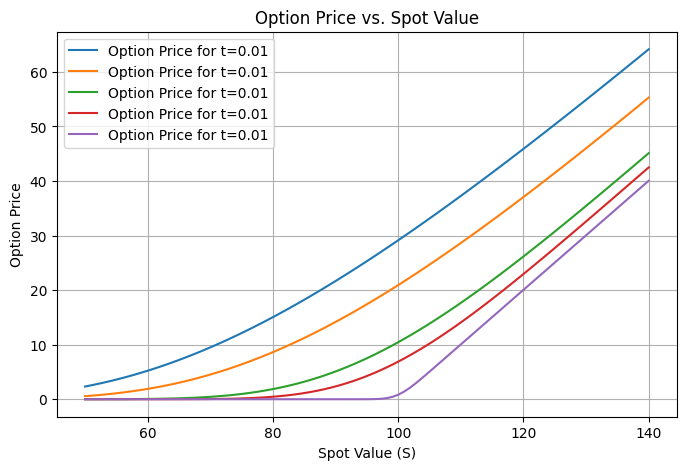

In [166]:
def plot_option_price_vs_spot(S_range,  options_prices):
    """
    Plot option price vs. spot value for a call option.

    Parameters:
    - S_range: Range of spot values
    - options_prices: list of options price
    """
    plt.figure(figsize=(8, 5))

    for price in options_prices:
        plt.plot(S_range, price, label=f'Option Price for t={t}')
    
    plt.title('Option Price vs. Spot Value')
    plt.xlabel('Spot Value (S)')
    plt.ylabel('Option Price')
    plt.legend()
    plt.grid(True)
    plt.show()
    
S_range = np.linspace(50, 140, 100)
T_range = np.array([5, 3, 1, 0.5, 0.01])
sigma = 0.2
K=100
r = 0.05

options_prices = []
for t in T_range:
    options_prices.append(black_scholes_vectorized(S_range, K, t, r, sigma))

plot_option_price_vs_spot(S_range, options_prices)

Write a function to compute implied volatility. This function should be vectorized as above.

In [168]:
import numpy as np
from scipy.optimize import fsolve, leastsq

def equation_to_minimize_bs(sigma, option_price, S, K, T, r, is_call):
        return black_scholes_vectorized(S, K, T, r, sigma, is_call) - option_price

def implied_volatility_vectorized(equation, option_price, S, K, T, r, is_call=True):
    if np.isscalar(option_price):  # If option_price is a scalar
        initial_volatility = 0.2
        iv = fsolve(equation, initial_volatility, args=(option_price, S, K, T, r, is_call))[0]
    else:  # If option_price is an array
        initial_volatility = np.full_like(option_price, 0.2)
        iv = leastsq(equation, initial_volatility, args=(option_price, S, K, T, r, is_call))

    return iv

Test this function using previously computed option price. Comment the result ?

In [169]:
S_range = np.linspace(50, 140, 100)
K_range = 100 * np.ones(len(S_range))
sigma_range = sigma * np.ones(len(S_range))  
r = 0.05
T=1
option_prices = black_scholes_vectorized(S_range, K_range, T, r, sigma_range)

implied_volatility_vectorized(equation_to_minimize_bs, option_prices, S_range, K_range, T, r, is_call=True)

(array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
        0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
        0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
        0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
        0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
        0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
        0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
        0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]),
 4)

Now, test this function on real market data. Plot implied volatility for all expiry in file

In [17]:
data_options = pd.read_excel("./example_pricedata_small_v2.xlsx")
data_options

,ticker,t,exp,K,Price,c,p
0,AAAA,2017-06-13T10:04:00Z,2017-07-14,115.0,146.355,31.500,0.035
1,AAAA,2017-06-13T10:04:00Z,2017-07-14,120.0,146.355,26.575,0.065
2,AAAA,2017-06-13T10:04:00Z,2017-07-14,125.0,146.355,21.650,0.130
3,AAAA,2017-06-13T10:04:00Z,2017-07-14,130.0,146.355,16.825,0.260
4,AAAA,2017-06-13T10:04:00Z,2017-07-14,135.0,146.355,12.150,0.550
...,...,...,...,...,...,...,...
291,BBBB,2017-06-13T15:05:00Z,2017-08-18,1300.0,977.585,0.485,322.850
292,BBBB,2017-06-13T15:05:00Z,2017-08-18,1320.0,977.585,0.380,342.775
293,BBBB,2017-06-13T15:05:00Z,2017-08-18,1360.0,977.585,0.345,382.775
294,BBBB,2017-06-13T15:05:00Z,2017-08-18,1380.0,977.585,0.310,402.750


In [170]:
def plot_volatility_smile(date, ticker, is_call, equation_to_minimize):
    data_sliced = data_options[(data_options["exp"] == date) & (data_options["ticker"] == ticker)]

    plt.figure(figsize=(8, 5))

    K_array = np.array(data_sliced["K"])

    if is_call:
        option_price_array =  np.array(data_sliced["c"])
    else:
        option_price_array =  np.array(data_sliced["p"])

    S = np.array(data_sliced["Price"])
    r = 0.05
    T = ((np.datetime64(np.array(data_sliced["exp"])[0]) - np.datetime64(np.array(data_sliced["t"])[0])).astype('timedelta64[D]')/ np.timedelta64(1, 'D')/365.25)
    
    iv = implied_volatility_vectorized(equation_to_minimize, option_price_array, S, K_array, T, r, is_call)[0]

    plt.plot(K_array, np.array(iv), label=f'Implied volatility for price {S[0]} at date {date}')
    plt.title('Implied volatility smile')
    plt.xlabel('Strike Value (S)')
    plt.ylabel('Implied volatility')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.clf()

Plot implied volatility for different configuration

C:\Users\aurel\AppData\Local\Temp\ipykernel_4648\3835626558.py:15: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  T = ((np.datetime64(np.array(data_sliced["exp"])[0]) - np.datetime64(np.array(data_sliced["t"])[0])).astype('timedelta64[D]')/ np.timedelta64(1, 'D')/365.25)


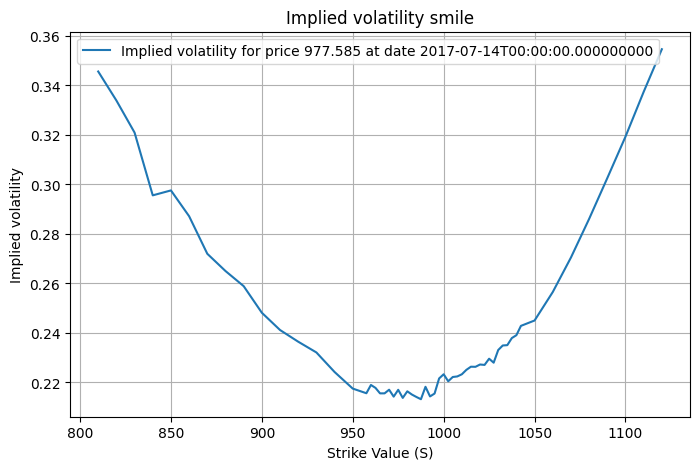

<Figure size 640x480 with 0 Axes>

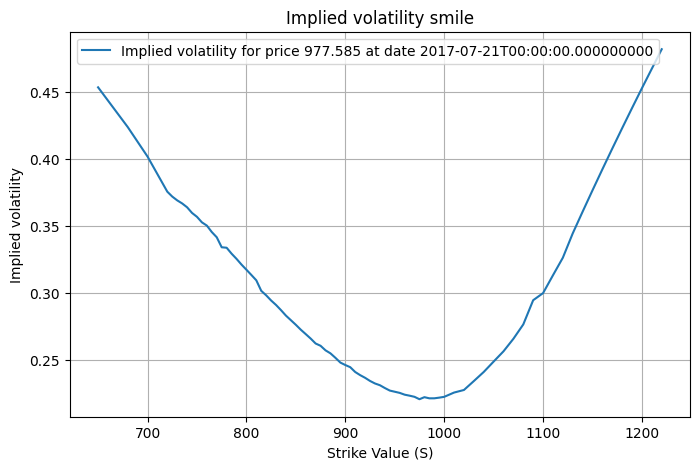

<Figure size 640x480 with 0 Axes>

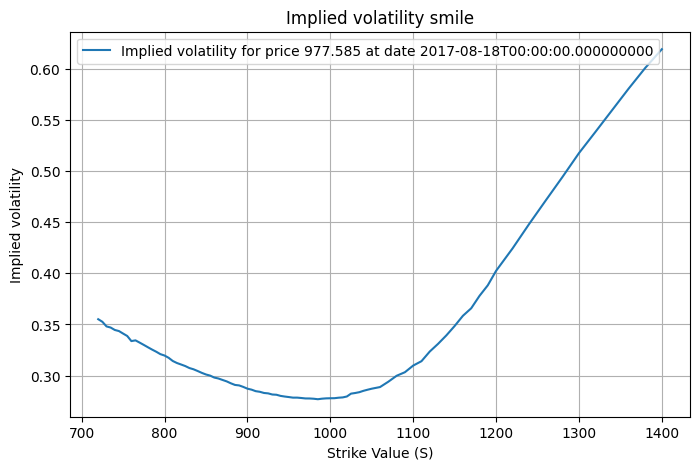

<Figure size 640x480 with 0 Axes>

In [171]:
for date in np.unique(data_options["exp"]):
    plot_volatility_smile(date, "BBBB", False, equation_to_minimize_bs)

### 1.2) Optional: Create other volatility surfaces using another pricing model

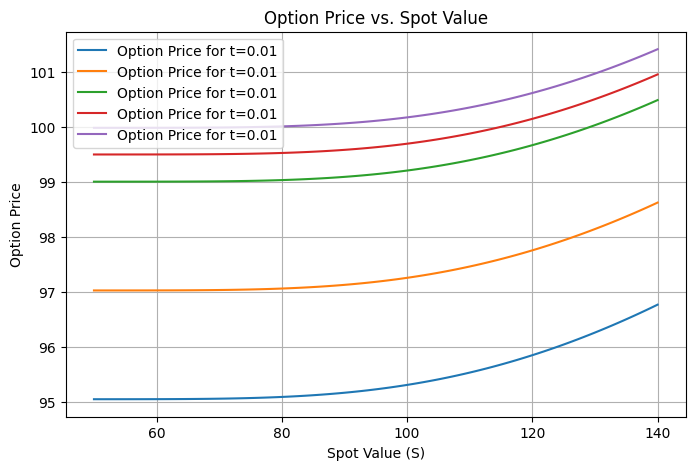

C:\Users\aurel\AppData\Local\Temp\ipykernel_4648\3835626558.py:15: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  T = ((np.datetime64(np.array(data_sliced["exp"])[0]) - np.datetime64(np.array(data_sliced["t"])[0])).astype('timedelta64[D]')/ np.timedelta64(1, 'D')/365.25)


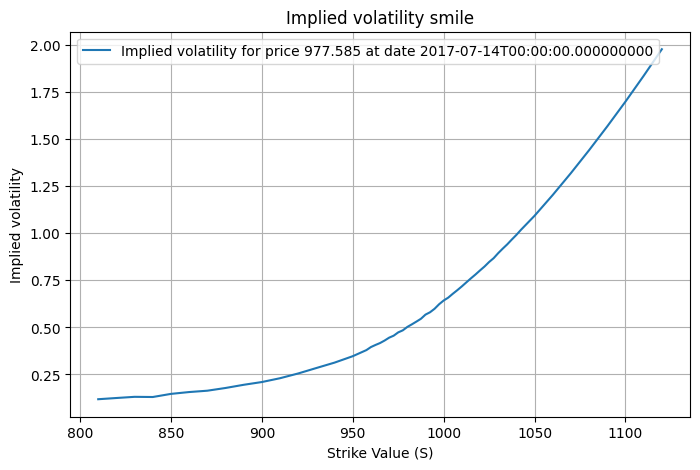

<Figure size 640x480 with 0 Axes>

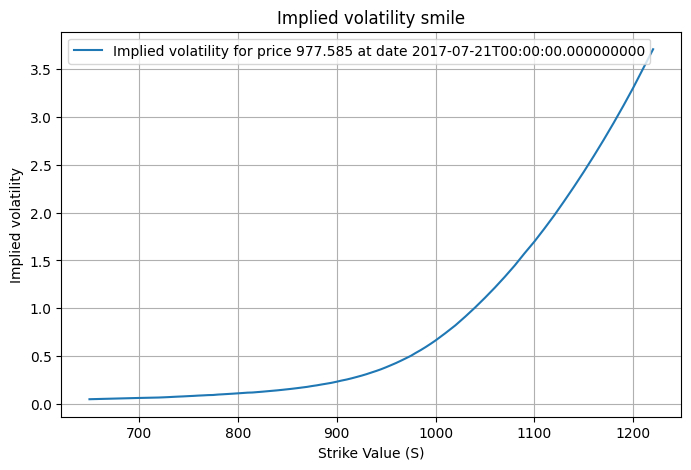

C:\Users\aurel\AppData\Local\Temp\ipykernel_4648\1395158084.py:2: RuntimeWarning: invalid value encountered in sqrt
  d = (S * np.exp(r*t) - K) / np.sqrt(sigma**2/(2 * r) * (np.exp(2*r*t)-1) )
C:\Users\aurel\AppData\Local\Temp\ipykernel_4648\1395158084.py:5: RuntimeWarning: invalid value encountered in sqrt
  np.exp(-r * t) * np.sqrt(sigma**2/(2*r) * (np.exp(2*r*t)-1) ) * norm.pdf(d)


<Figure size 640x480 with 0 Axes>

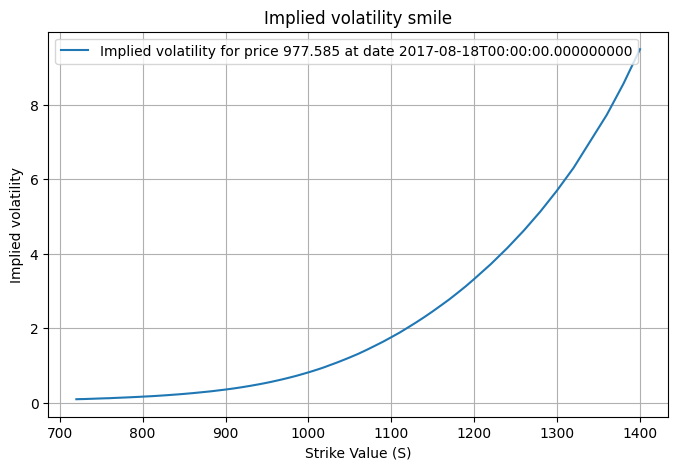

<Figure size 640x480 with 0 Axes>

In [172]:
def bachelier_vectorized(sigma, S, K, r, t, is_call=True):
    d = (S * np.exp(r*t) - K) / np.sqrt(sigma**2/(2 * r) * (np.exp(2*r*t)-1) )
   
    C = np.exp(-r * t) * (S * np.exp(r * t) - K) * norm.cdf(d) + \
        np.exp(-r * t) * np.sqrt(sigma**2/(2*r) * (np.exp(2*r*t)-1) ) * norm.pdf(d)
    
    if is_call:
        return C
    else:
        #Use put-call parity to calculate put price
        P = C - S + np.exp(-r * t) * K 
        return P

S_range = np.linspace(50, 140, 100)
T_range = np.array([5, 3, 1, 0.5, 0.01])
sigma = 0.2
K=100
r = 0.05

options_prices = []
for t in T_range:
    options_prices.append(bachelier_vectorized(S_range, K, t, r, sigma))

plot_option_price_vs_spot(S_range, options_prices)

def equation_to_minimize_bachelier(sigma, option_price, S, K, T, r, is_call):
        return bachelier_vectorized(S, K, T, r, sigma, is_call) - option_price

    
for date in np.unique(data_options["exp"]):
    plot_volatility_smile(date, "BBBB", False, equation_to_minimize_bachelier)